# 빌딩 전력 소모량 예측

여러분들의 분석 스킬과 머신러닝 스킬을 활용하여 빌딩의 전력 소모량을 예측하는 모델을 만들어 주세요!

Q : 여름에 고층 빌딩을 식히는 데 비용이 얼마나 드나요?
A : 많이 듭니다! 그리고 돈 뿐만 아니라 환경 영향도 있습니다.

건물 효율성을 개선하여 비용과 배출량을 줄이기 위해 상당한 투자가 이루어지고 있습니다. 문제는 개선이 효과적이었을까요?

건물 소유주는 전력을 사용한 만큼 청구서를 발행하는데,전력 계량기가 특정 건물 유형에서는 작동하지 않아 전력 사용량 측정에도 어려움을 겪고 있습니다.재의 추정 방법은 단편화되어 있으며 확장 성이 좋지 않습니다. 일부는 특정 미터 유형을 가정하거나 다른 건물 유형에서 작동하지 않습니다.

이 대회에서는 냉수, 전기, 온수 및 증기 계량기 분야에서 건물 에너지 사용량의 정확한 모델을 개발하게됩니다. 데이터는 3 년 동안 1,000 개 이상의 건물에서 가져온 것입니다. 이러한 에너지 절약 투자에 대한 더 나은 추정을 통해 대규모 투자자와 금융 기관은 건물 효율성 향상을 위해 이 분야에 투자 할 가능성이 높아질 것입니다.


## 데이터 설명

**데이터 설명**
- `building_id`-건물 ID 코드
- `meter`-측정기 ID 코드
    - {0 : 전기, 1 : 냉수, 2 : 증기, 3 : 온수}
- `timestamp`-측정이 수행 된 시기
- `primary_use`-미국 EnergyStar 속성 유형 정의를 기반으로하는 건물의 기본 활동 범주 표시기
- `square_feet`-건물의 전체 바닥 면적
- `year_built`-개관 연도
- `floor_count`-건물의 층 수
- `site_id` - 위치 ID 코드 
- `air_temperature`-기온 섭씨
- `cloud_coverage`-구름으로 덮인 하늘 부분 (Oktas 기준)
- `dew_ temperature`-이슬점 온도 섭씨
- `precip_depth_1_hr`- 0 mm, Trace(거의 안 내림), 5 mm, 8 mm
- `sea_level_pressure`-밀리바 or 헥토파스칼
- `wind_direction`-나침반 방향 (0-360)
- `wind_speed`-초당 미터
- `meter_reading`-Target 변수. 
    - kWh (또는 이에 상응하는) 단위의 에너지 소비량

<br/>
<br/>
<br/>
<br/>

## 모듈 import 

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

<br/>
<br/>
<br/>
<br/>

## 데이터 로드
 - ep_cat_data.csv 파일 로드

In [125]:
# Code here
df = pd.read_csv('dataset/ep_cat_data.csv')
df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,597,Electricity,2016-01-01 12:00:00,71.000,4,Public services,189425,1994.0,4.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
1,620,Electricity,2016-01-01 12:00:00,1122.880,4,Education,220703,2011.0,9.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
2,631,Electricity,2016-01-01 12:00:00,8.685,4,Education,23533,1906.0,3.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
3,641,Electricity,2016-01-01 12:00:00,393.528,4,Education,109588,1994.0,8.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
4,575,Electricity,2016-01-01 18:00:00,25.625,4,Technology/science,33167,1963.0,4.0,7.2,Few,-7.2,0 mm,1022.5,120.0,2.6


<br/>
<br/>
<br/>
<br/>

## 데이터 조회
 - 정보 조회
 - 데이터 타입 확인
 - 결측치 조회

In [126]:
# 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22514 entries, 0 to 22513
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building_id         22514 non-null  int64  
 1   meter               22514 non-null  object 
 2   timestamp           22514 non-null  object 
 3   meter_reading       22514 non-null  float64
 4   site_id             22514 non-null  int64  
 5   primary_use         22514 non-null  object 
 6   square_feet         22514 non-null  int64  
 7   year_built          22514 non-null  float64
 8   floor_count         22514 non-null  float64
 9   air_temperature     22514 non-null  float64
 10  cloud_coverage      22514 non-null  object 
 11  dew_temperature     22514 non-null  float64
 12  precip_depth_1_hr   22514 non-null  object 
 13  sea_level_pressure  22514 non-null  float64
 14  wind_direction      22514 non-null  float64
 15  wind_speed          22362 non-null  float64
dtypes: f

In [127]:
# 데이터 타입 확인
df.dtypes

building_id             int64
meter                  object
timestamp              object
meter_reading         float64
site_id                 int64
primary_use            object
square_feet             int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage         object
dew_temperature       float64
precip_depth_1_hr      object
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [128]:
# 결측치 조회
df.isnull().sum()

building_id             0
meter                   0
timestamp               0
meter_reading           0
site_id                 0
primary_use             0
square_feet             0
year_built              0
floor_count             0
air_temperature         0
cloud_coverage          0
dew_temperature         0
precip_depth_1_hr       0
sea_level_pressure      0
wind_direction          0
wind_speed            152
dtype: int64

<br/>
<br/>
<br/>
<br/>

## 기본 데이터 분석
 - 이상치 확인
     - 각 열 별 boxplot
     - 각 열 별 subplot으로 boxplot

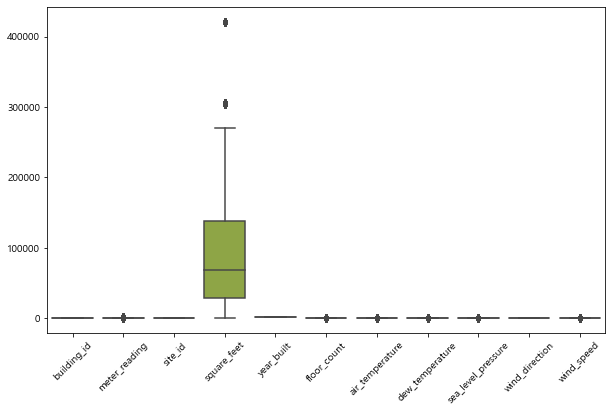

In [129]:
# 각 열 별 boxplot
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

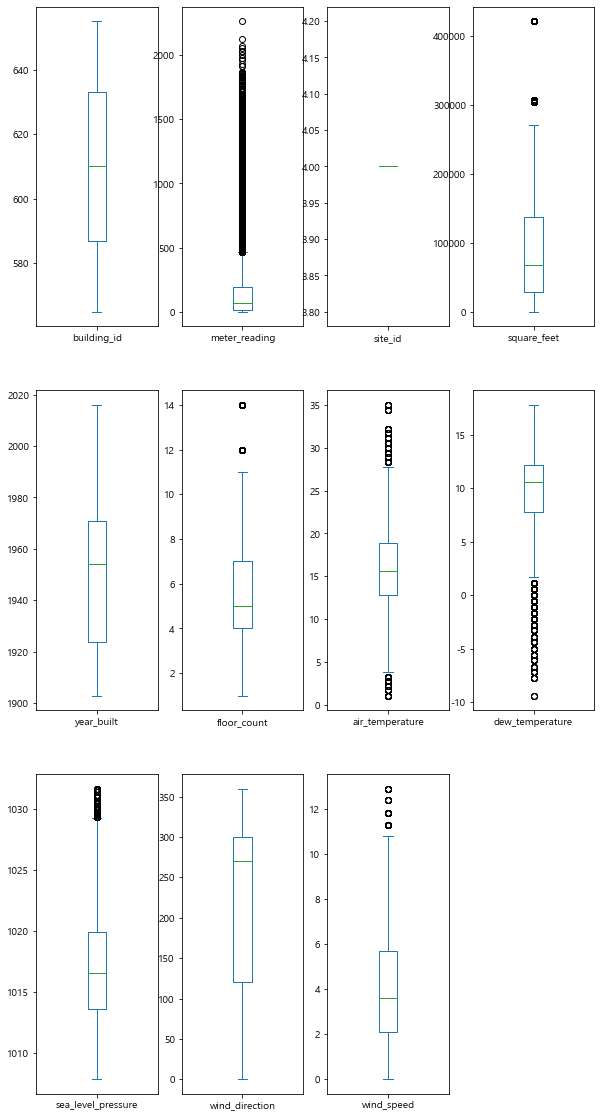

In [130]:
# 각 열 별 subplot으로 boxplot
arr=[i for i in df.corr().index]
plt.figure(figsize=(10,20))
for i in range(len(arr)):
    plt.subplot(3,4,i+1)
    df[arr[i]].plot(kind='box')

plt.show()

 - 상관 관계 확인
   - pairplot
   - correlation coefficient

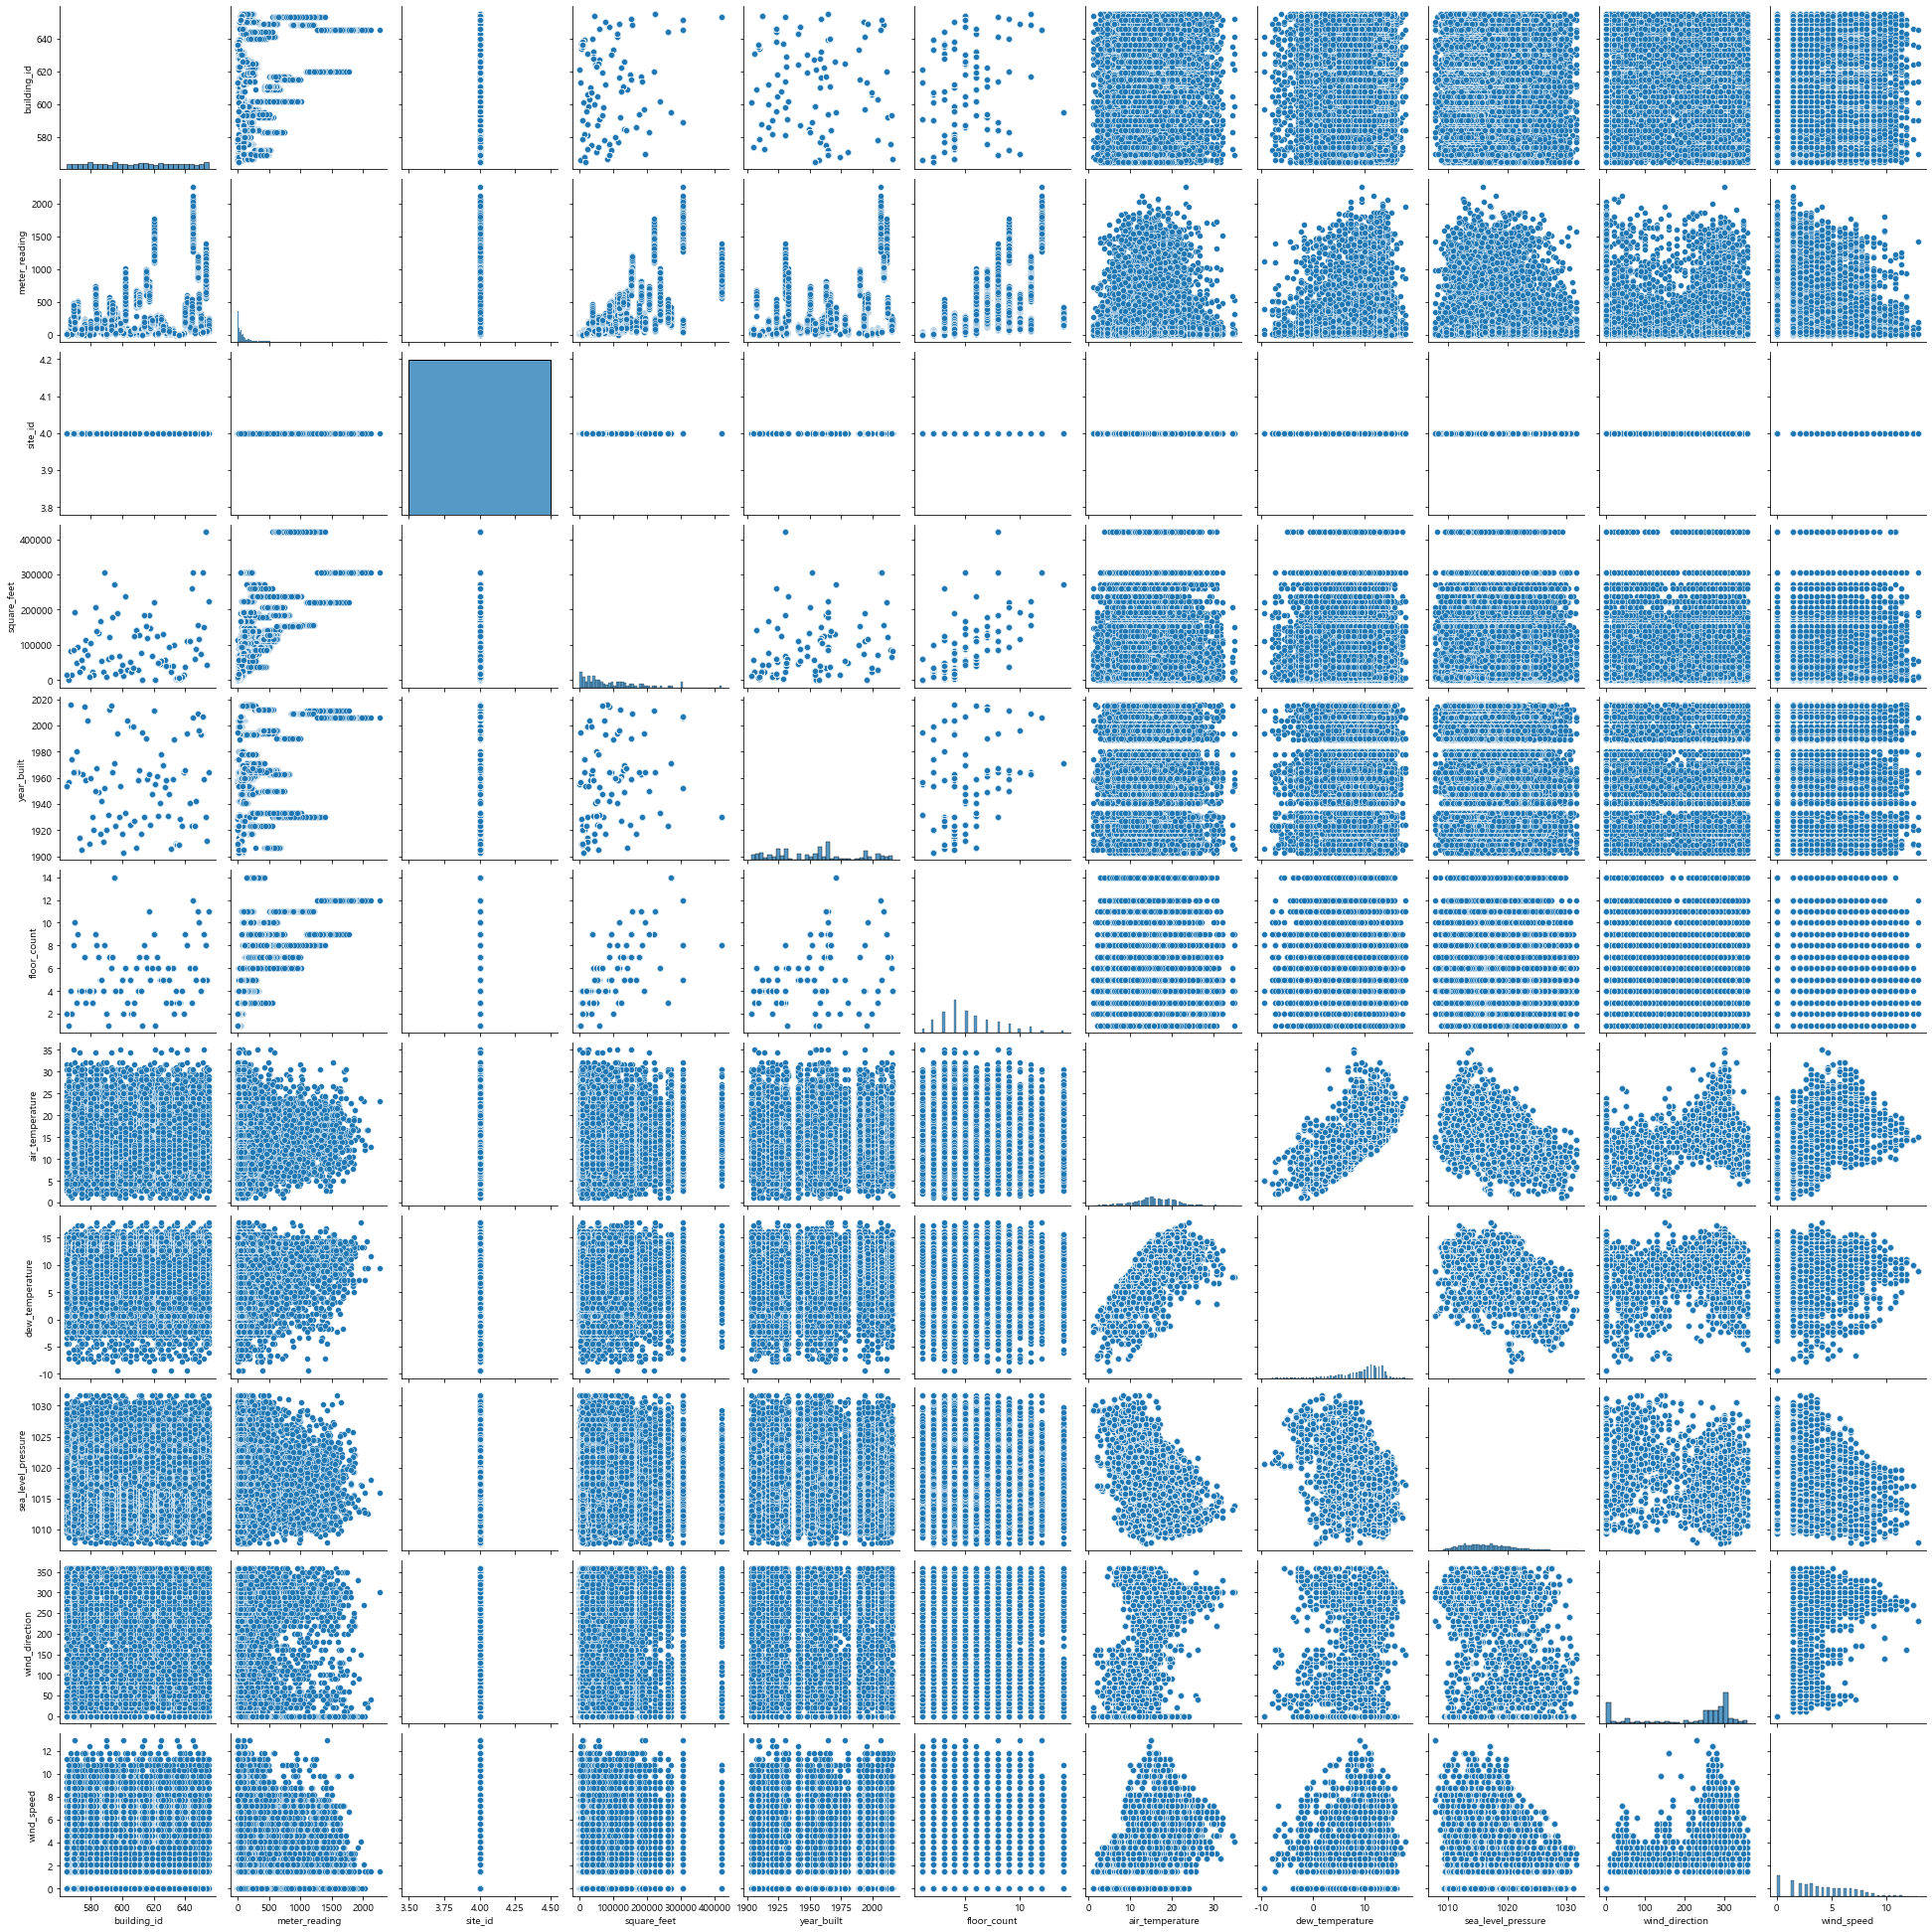

In [131]:
# pairplot
sns.pairplot(df)
plt.show()

In [132]:
# correlation coefficient
df.corr()

,building_id,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
building_id,1.000000,0.210775,NaN,0.194707,0.019292,0.189021,-0.002829,-0.001969,0.006818,-0.001560,-0.005877
meter_reading,0.210775,1.000000,NaN,0.606584,0.382341,0.627117,-0.015868,0.003103,0.004083,-0.034257,-0.037763
site_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_feet,0.194707,0.606584,NaN,1.000000,0.274804,0.643612,-0.005869,-0.009399,0.008428,-0.003087,-0.002293
year_built,0.019292,0.382341,NaN,0.274804,1.000000,0.301227,0.019356,0.016862,-0.019650,0.011309,0.013431
floor_count,0.189021,0.627117,NaN,0.643612,0.301227,1.000000,-0.005217,-0.004452,0.002793,0.003226,0.001895
air_temperature,-0.002829,-0.015868,NaN,-0.005869,0.019356,-0.005217,1.000000,0.656471,-0.493915,0.498560,0.473641
dew_temperature,-0.001969,0.003103,NaN,-0.009399,0.016862,-0.004452,0.656471,1.000000,-0.514916,0.308647,0.202614
sea_level_pressure,0.006818,0.004083,NaN,0.008428,-0.019650,0.002793,-0.493915,-0.514916,1.000000,-0.388086,-0.346963
wind_direction,-0.001560,-0.034257,NaN,-0.003087,0.011309,0.003226,0.498560,0.308647,-0.388086,1.000000,0.638127


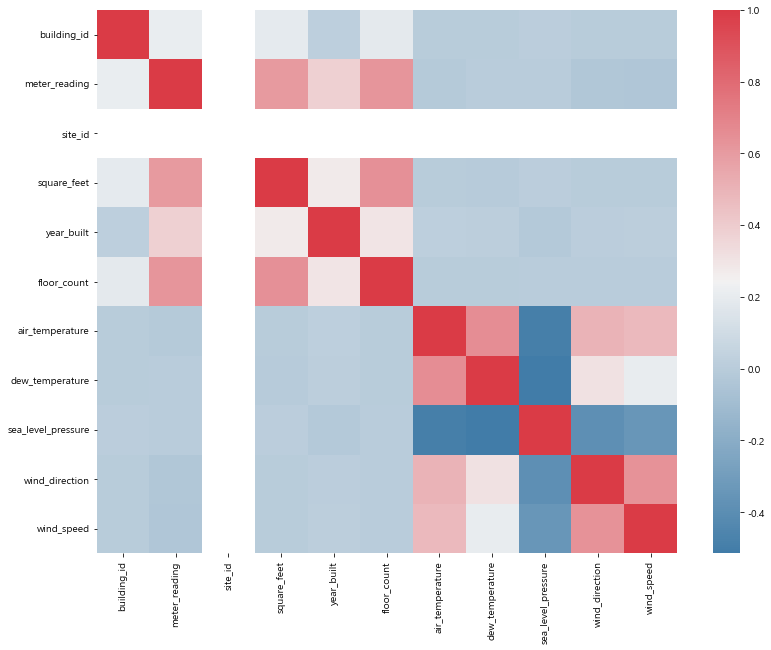

In [133]:
# 위의 결과를 heatmap으로 시각화하세요.
plt.figure(figsize=(13, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap)


plt.show()

<br/>
<br/>
<br/>
<br/>

## 결측치 처리
- wind_speed 결측치 처리
    - 중앙값으로 치환

In [134]:
# Code here
df['wind_speed'] = df['wind_speed'].fillna(df['wind_speed'].median())

df['wind_speed'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    2.6
Name: wind_speed, dtype: float64

In [135]:
# 결측치 조회
df.isnull().sum()

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
year_built            0
floor_count           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

<br/>
<br/>
<br/>
<br/>

## 값이 하나인 열 삭제
 - nunique가 1인 열 삭제

In [136]:
# 열 별 고윳값 수 확인
df.nunique()

building_id              89
meter                     1
timestamp              3830
meter_reading         14065
site_id                   1
primary_use               7
square_feet              89
year_built               58
floor_count              13
air_temperature          59
cloud_coverage            4
dew_temperature          49
precip_depth_1_hr         4
sea_level_pressure      228
wind_direction           37
wind_speed               24
dtype: int64

In [137]:
# 고윳값이 1개인 열 삭제

df=df.drop(['meter','site_id'],axis=1)

df

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,597,2016-01-01 12:00:00,71.000,Public services,189425,1994.0,4.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
1,620,2016-01-01 12:00:00,1122.880,Education,220703,2011.0,9.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
2,631,2016-01-01 12:00:00,8.685,Education,23533,1906.0,3.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
3,641,2016-01-01 12:00:00,393.528,Education,109588,1994.0,8.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
4,575,2016-01-01 18:00:00,25.625,Technology/science,33167,1963.0,4.0,7.2,Few,-7.2,0 mm,1022.5,120.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22509,574,2016-03-01 12:00:00,88.153,Education,56343,1905.0,4.0,11.7,Clear,7.8,0 mm,1018.6,60.0,1.5
22510,584,2016-03-01 12:00:00,230.448,Education,137806,1967.0,8.0,11.7,Clear,7.8,0 mm,1018.6,60.0,1.5
22511,596,2016-03-01 12:00:00,16.500,Education,18474,1923.0,4.0,11.7,Clear,7.8,0 mm,1018.6,60.0,1.5
22512,608,2016-03-01 12:00:00,97.250,Entertainment/public assembly,124197,1927.0,3.0,11.7,Clear,7.8,0 mm,1018.6,60.0,1.5


<br/>
<br/>
<br/>
<br/>

## 1차 학습
 - X = meter_reading 제외 수치형 특성
 - Y = meter_reading

In [138]:
# X, Y 선택
features = [
    'building_id',
#     'timestamp',
#     'meter_reading',
#     'primary_use',
    'square_feet',
    'year_built',
    'floor_count',
    'air_temperature',
#     'cloud_coverage',
    'dew_temperature',
#     'precip_depth_1_hr',
    'sea_level_pressure',
    'wind_direction',
    'wind_speed'
]

X = df[features]
Y = df['meter_reading']

In [139]:
# X, Y의 shape 확인
X.shape, Y.shape

((22514, 9), (22514,))

 - Random Forest 모델링
 - 75:25 데이터 분할
 - random_state = 0
 - metric: MAE

In [140]:
# 데이터 분할

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=0
)


In [141]:
# Random Forest 모델링

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.9963329216458932, 0.9774056091166459)

In [142]:
# 학습, 평가 데이터로 MAE 확인
from sklearn.metrics import mean_absolute_error

y_pred1 = model.predict(x_tr)
y_pred2 = model.predict(x_te)
mean_absolute_error(y_tr, y_pred1), mean_absolute_error(y_te, y_pred2)

(8.87786793728161, 22.964345835494758)

<br/>
<br/>
<br/>
<br/>

## 데이터 변환 #1

 - primary_use의 클래스 별 데이터 수 확인
 - primary_use에 따른 meter_reading의 평균을 barplot으로 시각화
  - plt.xticks(rotation=45)
 - primary_use 열을 정수로 변환 (Label Encoding)

In [143]:
# primary_use의 클래스 별 데이터 수 확인
df["primary_use"].value_counts()

Education                        16747
Entertainment/public assembly     1906
Public services                   1527
Lodging/residential                922
Parking                            620
Technology/science                 526
Utility                            266
Name: primary_use, dtype: int64

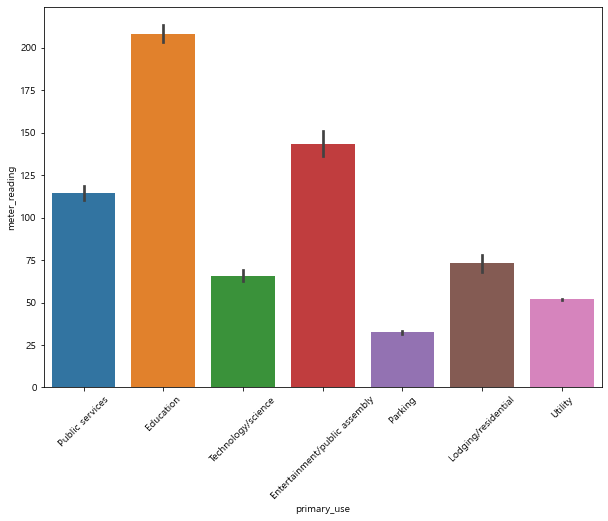

In [144]:
# primary_use에 따른 meter_reading의 평균을 barplot으로 시각화
plt.figure(figsize=(10,7))
sns.barplot(data = df,
            x = "primary_use",
            y = "meter_reading")


plt.xticks(rotation=45)
plt.show()

In [145]:
# primary_use 열을 정수로 변환 (Label Encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["primary_use"] = le.fit_transform(df["primary_use"])
df.head()

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,597,2016-01-01 12:00:00,71.000,4,189425,1994.0,4.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
1,620,2016-01-01 12:00:00,1122.880,0,220703,2011.0,9.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
2,631,2016-01-01 12:00:00,8.685,0,23533,1906.0,3.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
3,641,2016-01-01 12:00:00,393.528,0,109588,1994.0,8.0,5.0,Clear,-9.4,0 mm,1020.6,0.0,0.0
4,575,2016-01-01 18:00:00,25.625,5,33167,1963.0,4.0,7.2,Few,-7.2,0 mm,1022.5,120.0,2.6


 - cloud_coverage의 클래스 별 데이터 수 확인
 - cloud_coverage에 따른 meter_reading의 평균을 barplot으로 시각화
  - plt.xticks(rotation=45)
 - cloud_coverage의 클래스 별 meter_reading의 min, max, mean, median, std, count 출력
 - cloud_coverage 열 삭제

In [146]:
# cloud_coverage의 클래스 별 데이터 수 확인
df["cloud_coverage"].value_counts()

Few          12553
Clear         5904
Scattered     4030
Obscured        27
Name: cloud_coverage, dtype: int64

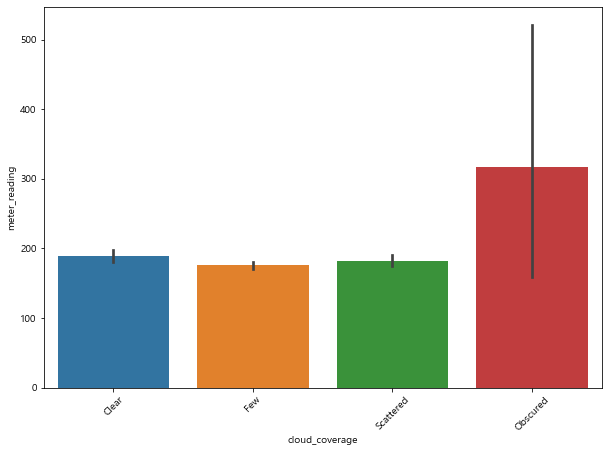

In [147]:
# cloud_coverage에 따른 meter_reading의 평균을 barplot으로 시각화
plt.figure(figsize=(10,7))
sns.barplot(data = df,
            x = "cloud_coverage",
            y = "meter_reading")
plt.xticks(rotation=45)
plt.show()

In [148]:
# cloud_coverage의 클래스 별 meter_reading의 min, max, mean, median, std, count 출력
df.groupby(["cloud_coverage"])[['meter_reading']].agg(['min', 'max', 'mean', 'median', 'std', 'count'])


meter_reading                                                  
                         min      max        mean    median         std  count
cloud_coverage                                                                
Clear                 0.0000  2264.22  188.890972   71.3950  305.720171   5904
Few                   0.0000  2126.80  175.968898   67.1467  281.632572  12553
Obscured              0.3225  1867.59  317.238919  136.4390  474.878855     27
Scattered             0.0000  1916.44  182.589464   66.8750  290.645745   4030

In [149]:
# cloud_coverage 열 삭제
df = df.drop(["cloud_coverage"], axis = 1)
df.head()

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,597,2016-01-01 12:00:00,71.000,4,189425,1994.0,4.0,5.0,-9.4,0 mm,1020.6,0.0,0.0
1,620,2016-01-01 12:00:00,1122.880,0,220703,2011.0,9.0,5.0,-9.4,0 mm,1020.6,0.0,0.0
2,631,2016-01-01 12:00:00,8.685,0,23533,1906.0,3.0,5.0,-9.4,0 mm,1020.6,0.0,0.0
3,641,2016-01-01 12:00:00,393.528,0,109588,1994.0,8.0,5.0,-9.4,0 mm,1020.6,0.0,0.0
4,575,2016-01-01 18:00:00,25.625,5,33167,1963.0,4.0,7.2,-7.2,0 mm,1022.5,120.0,2.6


 - precip_depth_1_hr의 클래스 별 데이터 수 확인
 - precip_depth_1_hr 컬럼 삭제

In [150]:
# precip_depth_1_hr의 클래스 별 데이터 수 확인
df['precip_depth_1_hr'].value_counts()

0 mm     22410
Trace       91
8 mm         7
5 mm         6
Name: precip_depth_1_hr, dtype: int64

In [151]:
# precip_depth_1_hr 컬럼 삭제
df = df.drop(["precip_depth_1_hr"], axis = 1)

df.head()

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,597,2016-01-01 12:00:00,71.000,4,189425,1994.0,4.0,5.0,-9.4,1020.6,0.0,0.0
1,620,2016-01-01 12:00:00,1122.880,0,220703,2011.0,9.0,5.0,-9.4,1020.6,0.0,0.0
2,631,2016-01-01 12:00:00,8.685,0,23533,1906.0,3.0,5.0,-9.4,1020.6,0.0,0.0
3,641,2016-01-01 12:00:00,393.528,0,109588,1994.0,8.0,5.0,-9.4,1020.6,0.0,0.0
4,575,2016-01-01 18:00:00,25.625,5,33167,1963.0,4.0,7.2,-7.2,1022.5,120.0,2.6


<br/>
<br/>
<br/>
<br/>

## 데이터 변환 #2

 - timestamp를 datetime64로 변경
 - timestamp에서 년, 분기, 월, 일, 요일, 시간을 추출하여 새 열 생성
 - timestamp 열 삭제

In [152]:
# timestamp를 datetime64로 변경
df['timestamp'] = df['timestamp'].astype('datetime64')

# timestamp에서 년, 분기, 월, 일, 요일, 시간을 추출하여 새 열 생성
df['year'] = df["timestamp"].dt.year
df['quarter'] = df["timestamp"].dt.quarter
df['month'] = df["timestamp"].dt.month
df['day'] = df["timestamp"].dt.day
df['dayofweek'] = df["timestamp"].dt.dayofweek
df['hour'] = df["timestamp"].dt.hour

df.head()

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,year,quarter,month,day,dayofweek,hour
0,597,2016-01-01 12:00:00,71.000,4,189425,1994.0,4.0,5.0,-9.4,1020.6,0.0,0.0,2016,1,1,1,4,12
1,620,2016-01-01 12:00:00,1122.880,0,220703,2011.0,9.0,5.0,-9.4,1020.6,0.0,0.0,2016,1,1,1,4,12
2,631,2016-01-01 12:00:00,8.685,0,23533,1906.0,3.0,5.0,-9.4,1020.6,0.0,0.0,2016,1,1,1,4,12
3,641,2016-01-01 12:00:00,393.528,0,109588,1994.0,8.0,5.0,-9.4,1020.6,0.0,0.0,2016,1,1,1,4,12
4,575,2016-01-01 18:00:00,25.625,5,33167,1963.0,4.0,7.2,-7.2,1022.5,120.0,2.6,2016,1,1,1,4,18


In [153]:
# timestamp 열 삭제
df = df.drop(["timestamp"], axis = 1)

df.head()

,building_id,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,year,quarter,month,day,dayofweek,hour
0,597,71.000,4,189425,1994.0,4.0,5.0,-9.4,1020.6,0.0,0.0,2016,1,1,1,4,12
1,620,1122.880,0,220703,2011.0,9.0,5.0,-9.4,1020.6,0.0,0.0,2016,1,1,1,4,12
2,631,8.685,0,23533,1906.0,3.0,5.0,-9.4,1020.6,0.0,0.0,2016,1,1,1,4,12
3,641,393.528,0,109588,1994.0,8.0,5.0,-9.4,1020.6,0.0,0.0,2016,1,1,1,4,12
4,575,25.625,5,33167,1963.0,4.0,7.2,-7.2,1022.5,120.0,2.6,2016,1,1,1,4,18


<br/>
<br/>
<br/>
<br/>

## 2차 학습
 - X = meter_reading 제외
 - Y = meter_reading

In [154]:
# X, Y 선택
features = [
    'building_id',
#     'meter_reading',
    'primary_use',
    'square_feet',
    'year_built',
    'floor_count',
    'air_temperature',
    'dew_temperature',
    'sea_level_pressure',
    'wind_direction',
    'wind_speed',
    'year',
    'quarter',
    'month',
    'day',
    'dayofweek',
    'hour'
]

X = df[features]
Y = df['meter_reading']

In [155]:
# X, Y의 shape 확인
X.shape,Y.shape

((22514, 16), (22514,))

 - Random Forest 모델링
 - 75:25 데이터 분할
 - random_state = 0
 - metric: MAE

In [156]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, Y, random_state= 0 ,test_size=0.25  )

In [157]:
# Random Forest 모델링
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.9985583168333686, 0.9911795820749455)

In [158]:
# 학습, 평가 데이터로 MAE 확인
from sklearn.metrics import mean_absolute_error
y_pred1 = model.predict(x_tr)
y_pred2 = model.predict(x_te)
mean_absolute_error(y_tr, y_pred1), mean_absolute_error(y_te, y_pred2)

(4.808007579271543, 12.373925328477531)